<a href="https://colab.research.google.com/github/JungMYEONG-jin/Stats_Project/blob/window/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series

- Time series is a sequence of observations happened sequentially in time.


# LSTM Model

- Long short term memory (LSTM) is an artificial recurrent neural network architecture of deep learning.
- Unlike feed_forward neural networks, LSTM has feedback connections.
- It can process entire sequences of data.
- This characteristic is extremely helpful when we deal with Time Series(Sequential) data.

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [7]:
cd sample_data

/content/sample_data


In [8]:
cd ../gdrive/

/content/gdrive


In [9]:
ls -al

total 16
dr-x------  2 root root 4096 Apr  8 15:07 .file-revisions-by-id/
drwx------ 12 root root 4096 Apr  8 15:07 MyDrive/
dr-x------  2 root root 4096 Apr  8 15:07 .shortcut-targets-by-id/
drwx------  2 root root 4096 Apr  8 15:07 .Trash/


In [10]:
cd MyDrive

/content/gdrive/MyDrive


In [11]:
cd 통특 과제 데이터

/content/gdrive/MyDrive/통특 과제 데이터


In [12]:
ls-al

total 87
-rw------- 1 root root 88784 Apr  8 14:43 TSLA.csv


# Working Process
- Keras, Tensorflow, Pandas, Scikit-Learn, Numpy
- Build LSTM model to predict the last value of a sequence of value.
- My data is TESLA stock price.

In [13]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print(df.shape)
df.head(5)

(1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


## Split data into train and test set to avoid overfit.
- target data is Close.(장 마감시간 price)
- train set size about 800.
- test set size 나머지

In [14]:
train = df.iloc[:800, 1:2].values
test = df.iloc[800:, 1:2].values

In [15]:
train

array([[52.444   ],
       [52.450001],
       [52.419998],
       [53.348   ],
       [52.844002],
       [54.5     ],
       [55.      ],
       [54.009998],
       [52.254002],
       [53.93    ],
       [53.476002],
       [52.486   ],
       [51.150002],
       [52.854   ],
       [52.537998],
       [53.52    ],
       [53.257999],
       [52.001999],
       [52.716   ],
       [49.908001],
       [48.716   ],
       [47.630001],
       [47.43    ],
       [47.      ],
       [47.972   ],
       [49.448002],
       [51.112   ],
       [51.076   ],
       [52.066002],
       [50.411999],
       [47.200001],
       [40.557999],
       [46.104   ],
       [45.585999],
       [46.200001],
       [48.372002],
       [49.124001],
       [48.068001],
       [49.060001],
       [50.411999],
       [48.178001],
       [49.009998],
       [50.41    ],
       [49.445999],
       [49.528   ],
       [50.220001],
       [50.549999],
       [50.608002],
       [52.792   ],
       [51.591999],


In [16]:
test

array([[ 56.287998],
       [ 57.604   ],
       [ 57.751999],
       [ 58.007999],
       [ 59.338001],
       [ 56.102001],
       [ 60.712002],
       [ 59.540001],
       [ 59.695999],
       [ 60.      ],
       [ 60.382   ],
       [ 62.580002],
       [ 54.051998],
       [ 61.153999],
       [ 62.790001],
       [ 60.666   ],
       [ 58.790001],
       [ 54.93    ],
       [ 52.903999],
       [ 51.049999],
       [ 52.922001],
       [ 51.506001],
       [ 52.200001],
       [ 51.812   ],
       [ 53.139999],
       [ 56.48    ],
       [ 53.858002],
       [ 53.478001],
       [ 52.136002],
       [ 52.773998],
       [ 60.209999],
       [ 63.444   ],
       [ 61.650002],
       [ 67.494003],
       [ 65.678001],
       [ 66.508003],
       [ 67.652   ],
       [ 68.748001],
       [ 68.099998],
       [ 67.814003],
       [ 68.667999],
       [ 69.699997],
       [ 69.800003],
       [ 69.674004],
       [ 66.632004],
       [ 68.540001],
       [ 68.466003],
       [ 69.0

## I learned data normalizing is necessary to deal with time series data. I will use MinMaxScaler to normalize the data set.

In [17]:
msc = MinMaxScaler()

In [18]:
train_scaled = msc.fit_transform(train)

In [19]:
train_scaled # 전처리 확인

array([[0.49064944],
       [0.49077223],
       [0.49015835],
       [0.50914599],
       [0.4988338 ],
       [0.53271681],
       [0.54294719],
       [0.52269098],
       [0.48676194],
       [0.52105416],
       [0.51176501],
       [0.4915088 ],
       [0.46417324],
       [0.49903836],
       [0.49257272],
       [0.51266524],
       [0.5073045 ],
       [0.48160576],
       [0.49621478],
       [0.43876093],
       [0.41437166],
       [0.39215128],
       [0.3880591 ],
       [0.37926097],
       [0.39914884],
       [0.42934899],
       [0.46339569],
       [0.4626591 ],
       [0.48291531],
       [0.44907312],
       [0.38335314],
       [0.24745261],
       [0.36092811],
       [0.35032941],
       [0.36289237],
       [0.4073332 ],
       [0.42271968],
       [0.4011131 ],
       [0.42141019],
       [0.44907312],
       [0.40336378],
       [0.42038709],
       [0.44903222],
       [0.42930801],
       [0.43098582],
       [0.44514469],
       [0.45189671],
       [0.453

In [20]:
train_x = []
train_y = []

# 60 time steps 
for i in range(60, 800):
  train_x.append(train_scaled[i-60:i, 0])
  train_y.append(train_scaled[i,0])

train_x = np.array(train_x)
train_y = np.array(train_y)

In [21]:
train_x

array([[0.49064944, 0.49077223, 0.49015835, ..., 0.44882765, 0.43045381,
        0.38171624],
       [0.49077223, 0.49015835, 0.50914599, ..., 0.43045381, 0.38171624,
        0.43589644],
       [0.49015835, 0.50914599, 0.4988338 , ..., 0.38171624, 0.43589644,
        0.39972175],
       ...,
       [0.83639574, 0.84016048, 0.86557271, ..., 0.63272909, 0.58407332,
        0.5830503 ],
       [0.84016048, 0.86557271, 0.87195655, ..., 0.58407332, 0.5830503 ,
        0.48197407],
       [0.86557271, 0.87195655, 0.91189591, ..., 0.5830503 , 0.48197407,
        0.53582684]])

## Reshape train_x to 3D vector

*   (values, time_steps, 1 dimensional output)



In [22]:
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1],1))

In [23]:
train_x.shape

(740, 60, 1)

# LSTM model with 4 hidden layers and 1 neuron for output layer for predicting stock price

In [25]:


model = Sequential()

# first layer

model.add(LSTM(units=50, return_sequences=True, input_shape = (train_x.shape[1], 1)))
model.add(Dropout(0.2))

# second layer

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# third layer

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# fourth layer

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# output layer

model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")


In [26]:
# train data!
model.fit(train_x, train_y, epochs=100, batch_size=32)


Epoch 1/100
24/24 [==============================] - 36s 16ms/step - loss: 0.1271
Epoch 2/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0186
Epoch 3/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0165
Epoch 4/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0134
Epoch 5/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0134
Epoch 6/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0112
Epoch 7/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0103
Epoch 8/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0108
Epoch 9/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0103
Epoch 10/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0106
Epoch 11/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0123
Epoch 12/100
24/24 [==============================] - 0s 12ms/step - loss: 0.0099
Epoch 13/100
24/24 [====

# Prepare Test Data and Reshape

In [27]:
train_data = df.iloc[:800, 1:2]
test_data = df.iloc[800:, 1:2]

total = pd.concat((train_data, test_data), axis=0)

inputs = total[len(total) - len(test_data)-60:].values

In [28]:
inputs = inputs.reshape(-1, 1)
inputs = msc.transform(inputs)

test_X = []

for i in range(60, 519):
  test_X.append(inputs[i-60:i, 0])

test_X = np.array(test_X)
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))



In [29]:
test_X.shape

(459, 60, 1)

# Predict the test data

In [30]:
pred_price = model.predict(test_X)
pred_price = msc.inverse_transform(pred_price)

# Plot the result


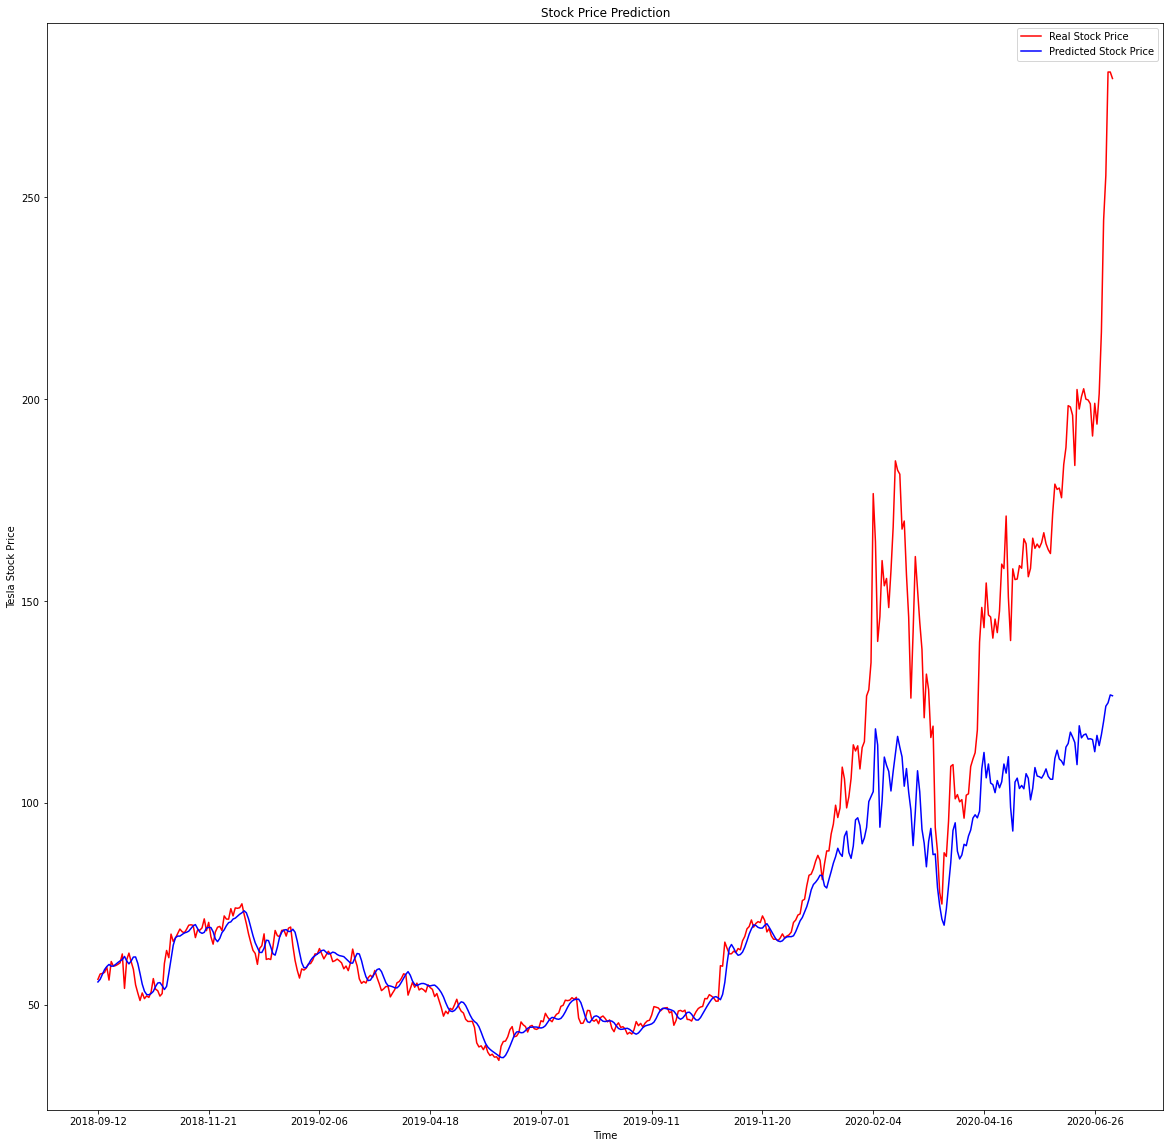

In [38]:
plt.figure(figsize=(20,20))
plt.plot(df.loc[800:, "Date"], test_data.values, color="red", label="Real Stock Price")
plt.plot(df.loc[800:, "Date"], pred_price, color="blue", label="Predicted Stock Price")
plt.xticks(np.arange(0, 459, 50))
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

## Our model looks good. 2020.03월에 대폭 하락하는데 이때 코로나가 발생하면서 전세계적으로 주가 하락이 발생하였음. 이러한 상황까지 잘 예측하였다.